<a href="https://colab.research.google.com/github/uppalurivenugopal/uvg_ml_dataset/blob/main/Diabetes_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

#Objective


In [2]:
# To diagnostically predict whether or not a women patient has diabetes, based on certain diagnostic measurements (Pregnancies, Glucose, BP, Skin Thickness, Insulin etc.)

#Data Importing

In [3]:
diabetes=pd.read_csv('https://raw.githubusercontent.com/uppalurivenugopal/uvg_ml_dataset/main/diabetes.csv')

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Metadata - 
# Pregnancies - Number of times pregnant
# Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BP - Diastolic blood pressure (mm Hg)
# Skin Thickness - Triceps skin fold thickness (mm)
# Insulin - 2-Hour serum insulin (mu U/ml)
# BMI - Body mass index (weight in kg/(height in m)^2)
# Diabetes pedigree function
# Age - 
# Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Exploring Numerical Data and checking for outliers

In [5]:
diabetes['Pregnancies'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,.98,0.99,1])
#percentile distribution looks fine. Only one outlier at 17

0.00     0.0
0.10     0.0
0.20     1.0
0.30     1.0
0.40     2.0
0.50     3.0
0.60     4.0
0.70     5.0
0.80     7.0
0.90     9.0
0.91     9.0
0.92     9.0
0.93    10.0
0.94    10.0
0.95    10.0
0.96    11.0
0.97    11.0
0.98    12.0
0.99    13.0
1.00    17.0
Name: Pregnancies, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


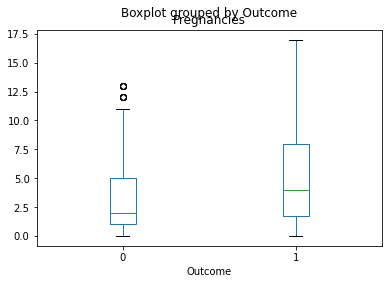

In [6]:
import matplotlib.pyplot as plt
diabetes.boxplot(by ='Outcome', column =['Pregnancies'], grid = False)
#Median number of pregancies is higher among people with Diabetes. Chances of diabetes are higher among women with number of pregnancies greater than12.5

In [7]:
diabetes['Glucose'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,.98,0.99,1])
#percentile distribution looks fine

0.00      0.00
0.10     85.00
0.20     95.00
0.30    102.00
0.40    109.00
0.50    117.00
0.60    125.00
0.70    134.00
0.80    147.00
0.90    167.00
0.91    170.00
0.92    173.00
0.93    176.00
0.94    179.00
0.95    181.00
0.96    184.00
0.97    187.99
0.98    192.32
0.99    196.00
1.00    199.00
Name: Glucose, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


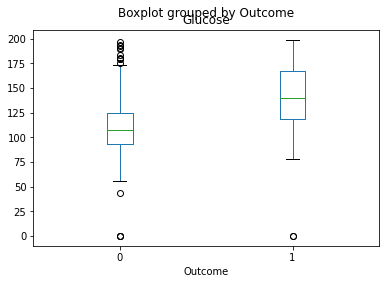

In [8]:
diabetes.boxplot(by ='Outcome', column =['Glucose'], grid = False)
#Median glucose levels of people with Diabetes is much higher (~150) than people without diabetes (~100)

In [9]:
diabetes['BloodPressure'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,.98,0.99,1])
#Percentile distribution appears to be fine - except for one outlier at 100th percentile

0.00      0.00
0.10     54.00
0.20     60.00
0.30     64.00
0.40     68.00
0.50     72.00
0.60     74.00
0.70     78.00
0.80     82.00
0.90     88.00
0.91     88.00
0.92     88.00
0.93     90.00
0.94     90.00
0.95     90.00
0.96     92.00
0.97     94.99
0.98     99.32
0.99    106.00
1.00    122.00
Name: BloodPressure, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


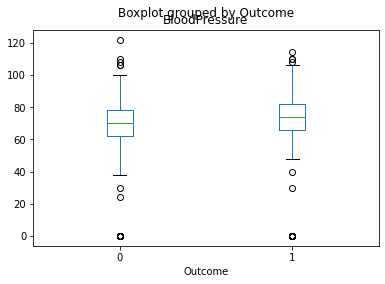

In [10]:
diabetes.boxplot(by ='Outcome', column =['BloodPressure'], grid = False)
#No significant difference in BP data between people with diabates and without diabetes

In [11]:
diabetes['SkinThickness'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,.98,0.99,1])
#Percentile distribution appears to be fine - except for one outlier at 100th percentile

0.00     0.00
0.10     0.00
0.20     0.00
0.30     8.20
0.40    18.00
0.50    23.00
0.60    27.00
0.70    31.00
0.80    35.00
0.90    40.00
0.91    41.00
0.92    41.00
0.93    42.00
0.94    43.00
0.95    44.00
0.96    45.32
0.97    46.00
0.98    48.00
0.99    51.33
1.00    99.00
Name: SkinThickness, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


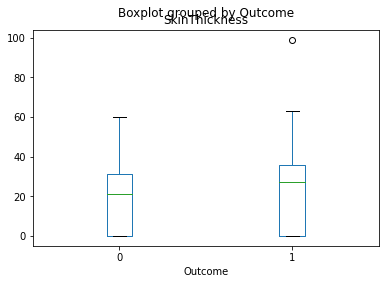

In [12]:
diabetes.boxplot(by ='Outcome', column =['SkinThickness'], grid = False)
#No significant difference in Skin Thickness data between people with diabates and without diabetes

In [13]:
diabetes['Insulin'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,.98,0.99,1])
#Percentile distribution appears to be fine - except for one outlier at 100th percentile

0.00      0.00
0.10      0.00
0.20      0.00
0.30      0.00
0.40      0.00
0.50     30.50
0.60     72.20
0.70    106.00
0.80    150.00
0.90    210.00
0.91    224.85
0.92    236.28
0.93    260.17
0.94    276.96
0.95    293.00
0.96    325.00
0.97    369.90
0.98    470.94
0.99    519.90
1.00    846.00
Name: Insulin, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


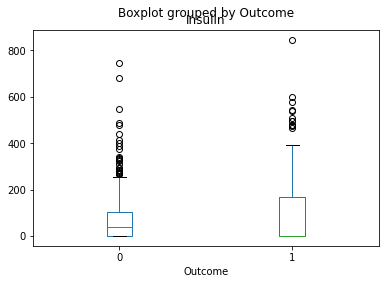

In [14]:
diabetes.boxplot(by ='Outcome', column =['Insulin'], grid = False)
#Higher chances if diabetes if Insulin is above 300

In [15]:
diabetes['BMI'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,.98,0.99,1])
# Percentile distribution looks fine

0.00     0.000
0.10    23.600
0.20    25.900
0.30    28.200
0.40    30.100
0.50    32.000
0.60    33.700
0.70    35.490
0.80    37.800
0.90    41.500
0.91    42.300
0.92    42.764
0.93    43.300
0.94    43.500
0.95    44.395
0.96    45.332
0.97    46.100
0.98    47.526
0.99    50.759
1.00    67.100
Name: BMI, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


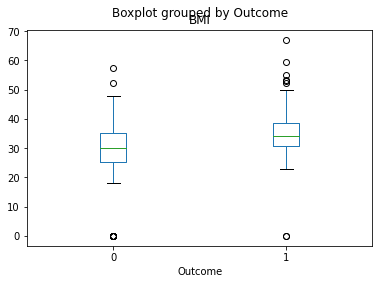

In [16]:
diabetes.boxplot(by ='Outcome', column =['BMI'], grid = False)
#No significant difference

In [17]:
diabetes['DiabetesPedigreeFunction'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,.98,0.99,1])

0.00    0.07800
0.10    0.16500
0.20    0.21940
0.30    0.25900
0.40    0.30280
0.50    0.37250
0.60    0.45420
0.70    0.56370
0.80    0.68700
0.90    0.87860
0.91    0.90500
0.92    0.94592
0.93    0.96800
0.94    1.05654
0.95    1.13285
0.96    1.18424
0.97    1.25793
0.98    1.39066
0.99    1.69833
1.00    2.42000
Name: DiabetesPedigreeFunction, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


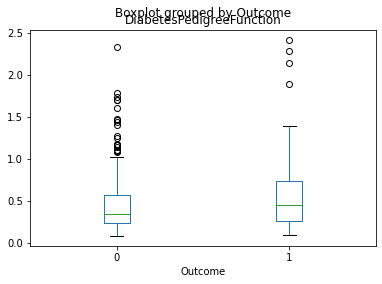

In [18]:
diabetes.boxplot(by ='Outcome', column =['DiabetesPedigreeFunction'], grid = False)
#No significant difference

# Model Building on Base Data

In [19]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [20]:
logistic.fit(diabetes[['Pregnancies']+['Glucose']+['BloodPressure']+['SkinThickness']+['Insulin']+['BMI']+['DiabetesPedigreeFunction']+['Age']],diabetes[['Outcome']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

Intercept [-7.70292768]
Coefficients [[ 1.17252350e-01  3.36000076e-02 -1.40873332e-02 -1.27042278e-03
  -1.24033067e-03  7.72021578e-02  1.41904228e+00  1.00352115e-02]]


#Confusion Matrix and Accuracy

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [23]:
predict=logistic.predict(diabetes[['Pregnancies']+['Glucose']+['BloodPressure']+['SkinThickness']+['Insulin']+['BMI']+['DiabetesPedigreeFunction']+['Age']])
predict

cm = confusion_matrix(diabetes[['Outcome']],predict)
print(cm)

[[447  53]
 [114 154]]


In [24]:
print("col sums", sum(cm))
total=sum(sum(cm))
print("Total", total)

col sums [561 207]
Total 768


In [25]:
accuracy=(cm[0,0]+cm[1,1])/total
accuracy

0.7825520833333334

In [26]:
Sensitivity=(cm[0,0])/(cm[0,0]+cm[1,0])
Sensitivity

0.7967914438502673

In [27]:
Specificity=(cm[1,1])/(cm[0,1]+cm[1,1])
Specificity

0.7439613526570048

#Multicollinearity

In [28]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
vif_cal(input_data=diabetes, dependent_col="Outcome")
#No column with VIF value below 5

Pregnancies  VIF =  1.43
Glucose  VIF =  1.3
BloodPressure  VIF =  1.18
SkinThickness  VIF =  1.51
Insulin  VIF =  1.43
BMI  VIF =  1.3
DiabetesPedigreeFunction  VIF =  1.07
Age  VIF =  1.59


#Individual Impact of Variables

In [30]:
import statsmodels.api as sm
m1=sm.Logit(diabetes['Outcome'],diabetes[['Pregnancies']+['Glucose']+['BloodPressure']+['SkinThickness']+['Insulin']+['BMI']+['DiabetesPedigreeFunction']+['Age']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 20 May 2022   Pseudo R-squ.:                 0.05922
Time:                        10:22:28   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [31]:
#Removing SkinThickness, Insulin, BMI,DiabetesPedigreeFunction and Age as they have p value more than 0.05
m2=sm.Logit(diabetes['Outcome'],diabetes[['Pregnancies']+['Glucose']+['BloodPressure']])
m2.fit()
print(m2.fit().summary())

Optimization terminated successfully.
         Current function value: 0.613118
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613118
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      765
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 May 2022   Pseudo R-squ.:                 0.05207
Time:                        10:22:57   Log-Likelihood:                -470.87
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.835e-12
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------


#Checking Final Accuracy

In [32]:
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression()

In [33]:
logistic1.fit(diabetes[['Pregnancies']+['Glucose']+['BloodPressure']],diabetes[['Outcome']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
print("Intercept", logistic1.intercept_)
print("Coefficients", logistic1.coef_)

Intercept [-5.52415278]
Coefficients [[ 0.12620928  0.03751464 -0.00423269]]


In [35]:
predict1=logistic1.predict(diabetes[['Pregnancies']+['Glucose']+['BloodPressure']])
predict1

cm1 = confusion_matrix(diabetes[['Outcome']],predict1)
print(cm1)

[[440  60]
 [132 136]]


In [36]:
accuracy1=(cm1[0,0]+cm1[1,1])/total
accuracy1

0.75

In [37]:
Sensitivity1=(cm1[0,0])/(cm1[0,0]+cm1[1,0])
Sensitivity1

0.7692307692307693

In [38]:
Specificity1=(cm1[1,1])/(cm1[0,1]+cm1[1,1])
Specificity1

0.6938775510204082

#Decision Tree - To identify key parameters

In [54]:
from sklearn import tree

features= ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
print("Features",features)

X = diabetes[features]
print("X shape", X.shape)
y = diabetes['Outcome']
print("Y shape", y.shape)

Features ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X shape (768, 8)
Y shape (768,)


|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- class: 0
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- class: 0
|   |--- BMI >  29.95
|   |   |--- class: 1



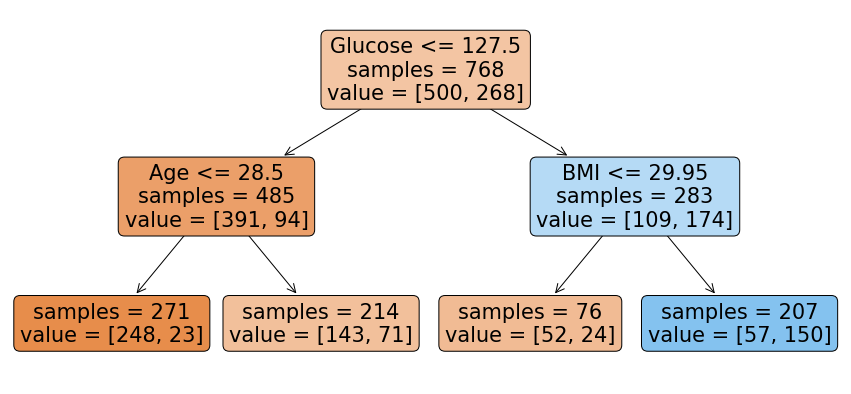

In [55]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=2)
DTree.fit(X,y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

# Feature Engineering

In [39]:
diabetes_v1=diabetes

In [40]:
diabetes_v1['Glucose_seg']=np.where(diabetes['Glucose']<127.5,0,1)
diabetes_v1['Age_seg']=np.where(diabetes['Age']<28.5,0,1)
diabetes_v1['BMI_seg']=np.where(diabetes['BMI']<40,0,1)

In [41]:
diabetes_v1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_seg,Age_seg,BMI_seg
0,6,148,72,35,0,33.6,0.627,50,1,1,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1,1,1


In [42]:
diabetes_v2=diabetes_v1[['Pregnancies','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Outcome','Glucose_seg','Age_seg','BMI_seg']]

In [43]:
diabetes_v2.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,Glucose_seg,Age_seg,BMI_seg
0,6,72,35,0,0.627,1,1,1,0
1,1,66,29,0,0.351,0,0,1,0
2,8,64,0,0,0.672,1,1,1,0
3,1,66,23,94,0.167,0,0,0,0
4,0,40,35,168,2.288,1,1,1,1


In [44]:
from sklearn.linear_model import LogisticRegression
logistic3 = LogisticRegression()

In [45]:
diabetes_v3=diabetes_v2[['Pregnancies','BloodPressure','SkinThickness','Insulin','BMI_seg','DiabetesPedigreeFunction','Outcome']]

In [46]:
logistic3.fit(diabetes_v3[['Pregnancies']+['BloodPressure']+['SkinThickness']+['Insulin']+['BMI_seg']+['DiabetesPedigreeFunction']],diabetes_v3[['Outcome']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [47]:
print("Intercept", logistic3.intercept_)
print("Coefficients", logistic3.coef_)

Intercept [-1.99583323]
Coefficients [[ 1.62455434e-01  6.48408189e-05 -1.30150694e-03  2.19570378e-03
   9.68730593e-01  8.80030571e-01]]


In [48]:
predict3=logistic3.predict(diabetes_v3[['Pregnancies']+['BloodPressure']+['SkinThickness']+['Insulin']+['BMI_seg']+['DiabetesPedigreeFunction']])
predict3

cm3 = confusion_matrix(diabetes_v3[['Outcome']],predict3)
print(cm3)

[[449  51]
 [183  85]]


In [50]:
accuracy3=(cm3[0,0]+cm3[1,1])/total
accuracy3

0.6953125

In [52]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [53]:
vif_cal(input_data=diabetes_v3, dependent_col="Outcome")
#No column with VIF value below 5

Pregnancies  VIF =  1.04
BloodPressure  VIF =  1.08
SkinThickness  VIF =  1.33
Insulin  VIF =  1.26
BMI_seg  VIF =  1.07
DiabetesPedigreeFunction  VIF =  1.07


In [56]:
import statsmodels.api as sm
m3=sm.Logit(diabetes_v3['Outcome'],diabetes_v3[['Pregnancies']+['BloodPressure']+['SkinThickness']+['Insulin']+['BMI_seg']+['DiabetesPedigreeFunction']])
m3.fit()
print(m3.fit().summary())

Optimization terminated successfully.
         Current function value: 0.613110
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613110
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 May 2022   Pseudo R-squ.:                 0.05209
Time:                        11:37:13   Log-Likelihood:                -470.87
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 6.078e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [57]:
import statsmodels.api as sm
m4=sm.Logit(diabetes_v3['Outcome'],diabetes_v3[['Pregnancies']+['BloodPressure']+['Insulin']+['BMI_seg']])
m4.fit()
print(m4.fit().summary())

Optimization terminated successfully.
         Current function value: 0.615687
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615687
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 May 2022   Pseudo R-squ.:                 0.04810
Time:                        11:38:08   Log-Likelihood:                -472.85
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.361e-10
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------


In [58]:
#Building final logistic model on these 4 variables

In [59]:
from sklearn.linear_model import LogisticRegression
logistic5 = LogisticRegression()

In [60]:
logistic5.fit(diabetes_v3[['Pregnancies']+['BloodPressure']+['Insulin']+['BMI_seg']],diabetes_v3[['Outcome']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
print("Intercept", logistic5.intercept_)
print("Coefficients", logistic5.coef_)

Intercept [-1.62875776]
Coefficients [[1.58971849e-01 1.84348942e-04 2.46588488e-03 1.07154726e+00]]


In [63]:
predict5=logistic5.predict(diabetes_v3[['Pregnancies']+['BloodPressure']+['Insulin']+['BMI_seg']])
predict5

cm5 = confusion_matrix(diabetes_v3[['Outcome']],predict5)
print(cm5)

[[456  44]
 [192  76]]


In [64]:
print("col sums", sum(cm5))
total=sum(sum(cm5))
print("Total", total)

col sums [648 120]
Total 768


In [65]:
accuracy5=(cm5[0,0]+cm5[1,1])/total
accuracy5

0.6927083333333334

In [ ]:
Feature Engineering was done on three variables - Glucose, Age, BMI
Model built only with BMI_seg and the accuracy has gone down by 6 percentage points. 
We will now add one more feature engineering variable

In [ ]:
diabetes_v6=diabetes_v2[['Pregnancies','BloodPressure','SkinThickness','Insulin','BMI_seg','DiabetesPedigreeFunction','Outcome']]